# **TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Upload the Dataset

In [2]:
df=pd.read_csv('blogs_categories.csv')
df

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [3]:
df.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [4]:
#checking null values
df.isnull().sum()

,0
Unnamed: 0,0
Data,0
Labels,0


In [5]:
#creating a column for length of the data
df['len']=df['Data'].apply(len)
df

,Unnamed: 0,Data,Labels,len
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,12424
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,32530
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,4550
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,2067
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,1347
...,...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,1803
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,2087
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,1621
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,2627


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'len'}>]], dtype=object)

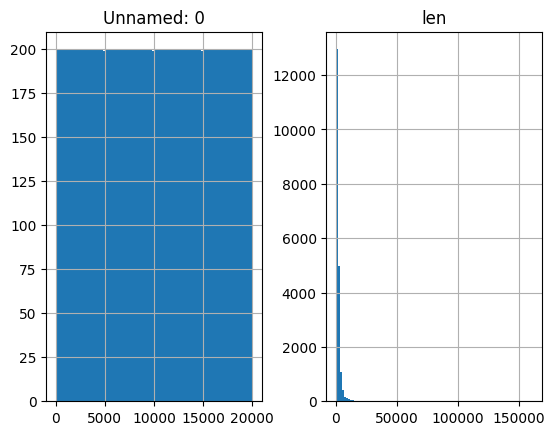

In [6]:
df.hist(bins=100)

array([[<Axes: title={'center': 'alt.atheism'}>,
        <Axes: title={'center': 'comp.graphics'}>,
        <Axes: title={'center': 'comp.os.ms-windows.misc'}>,
        <Axes: title={'center': 'comp.sys.ibm.pc.hardware'}>],
       [<Axes: title={'center': 'comp.sys.mac.hardware'}>,
        <Axes: title={'center': 'comp.windows.x'}>,
        <Axes: title={'center': 'misc.forsale'}>,
        <Axes: title={'center': 'rec.autos'}>],
       [<Axes: title={'center': 'rec.motorcycles'}>,
        <Axes: title={'center': 'rec.sport.baseball'}>,
        <Axes: title={'center': 'rec.sport.hockey'}>,
        <Axes: title={'center': 'sci.crypt'}>],
       [<Axes: title={'center': 'sci.electronics'}>,
        <Axes: title={'center': 'sci.med'}>,
        <Axes: title={'center': 'sci.space'}>,
        <Axes: title={'center': 'soc.religion.christian'}>],
       [<Axes: title={'center': 'talk.politics.guns'}>,
        <Axes: title={'center': 'talk.politics.mideast'}>,
        <Axes: title={'center': 'ta

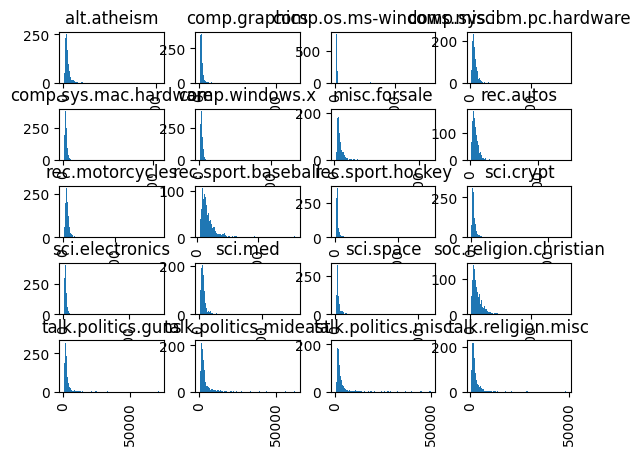

In [7]:
df.hist('len',by='Labels',bins=100)

In [8]:
df['len'].describe()

,len
count,19997.000000
mean,2306.974196
std,3912.979447
min,345.000000
25%,1139.000000
50%,1600.000000
75%,2321.000000
max,161040.000000


In [9]:
#import nltk library
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [10]:
!pip install spacy

In [11]:
!pip install wordcloud

In [12]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

In [16]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stopwords_list = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stopwords_list]
    # Join tokens back into text
    text = ' '.join(tokens)
    return text

In [17]:
#Apply text preprocessing to the 'text' column
df['cleaned_text']=df['Data'].apply(preprocess_text)

In [18]:
#Feature extraction using TF-IDF
tfidf_vec=TfidfVectorizer(max_features=5000)
tfidf_vec

TfidfVectorizer(max_features=5000)

In [19]:
a=tfidf_vec.fit_transform(df['cleaned_text'])

In [20]:
a

<19997x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1823934 stored elements in Compressed Sparse Row format>

In [21]:
b=df['Labels']

In [22]:
b

,Labels
0,alt.atheism
1,alt.atheism
2,alt.atheism
3,alt.atheism
4,alt.atheism
...,...
19992,talk.religion.misc
19993,talk.religion.misc
19994,talk.religion.misc
19995,talk.religion.misc


In [23]:
#splitting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.75,random_state=100)

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4999, 5000)
(4999,)
(14998, 5000)
(14998,)


In [25]:
#using NaiveBayes algorithm
naive_bayes=MultinomialNB()

In [26]:
naive_bayes.fit(x_train,y_train)

MultinomialNB()

In [27]:
# predicting the data
y_pred=naive_bayes.predict(x_test)

In [28]:
y_pred

array(['sci.med', 'talk.politics.misc', 'comp.sys.mac.hardware', ...,
       'comp.os.ms-windows.misc', 'rec.sport.hockey',
       'comp.sys.mac.hardware'], dtype='<U24')

In [29]:
#  finding performance metrics using accuracy score,precision,recall and f1 score
accuracy_score(y_test,y_pred)

0.853047072943059

In [30]:
classification_report(y_test,y_pred)

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.76      0.79      0.78       750\n           comp.graphics       0.81      0.84      0.83       741\n comp.os.ms-windows.misc       0.70      0.88      0.78       735\ncomp.sys.ibm.pc.hardware       0.77      0.80      0.78       750\n   comp.sys.mac.hardware       0.84      0.91      0.87       733\n          comp.windows.x       0.89      0.88      0.88       745\n            misc.forsale       0.87      0.83      0.85       762\n               rec.autos       0.90      0.87      0.89       753\n         rec.motorcycles       0.96      0.93      0.95       757\n      rec.sport.baseball       0.97      0.96      0.97       756\n        rec.sport.hockey       0.98      0.97      0.98       758\n               sci.crypt       0.93      0.95      0.94       741\n         sci.electronics       0.90      0.76      0.83       752\n                 sci.med       0.98      0.89      0.93    

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [32]:
!python -m nltk.downloader vader_lexicon

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
#sentiment Analysis
sent_analy=SentimentIntensityAnalyzer()

In [34]:
sentiments=[]
for text in df['Data']:
  sentiment_scr=sent_analy.polarity_scores(text)
  if sentiment_scr['compound']>0:
    sentiments.append('positive+ve')
  elif sentiment_scr['compound']<0:
    sentiments.append('negative-ve')
  else:
    sentiments.append('neutral')

In [35]:
# adding sentiments to the data
df['sentiment']=sentiments

In [36]:
#Examining the distribution of sentiments
sentiment_dist=df.groupby(['Labels','sentiment']).size().unstack(fill_value=0)
print("\n sentiment Distribution Across Categories:")
print(sentiment_dist)


 sentiment Distribution Across Categories:
sentiment                 negative-ve  neutral  positive+ve
Labels                                                     
alt.atheism                       379        8          613
comp.graphics                     123       47          830
comp.os.ms-windows.misc           204       45          751
comp.sys.ibm.pc.hardware          218       19          763
comp.sys.mac.hardware             243       47          710
comp.windows.x                    226       40          734
misc.forsale                      126       70          804
rec.autos                         304       28          668
rec.motorcycles                   311       20          669
rec.sport.baseball                228       39          733
rec.sport.hockey                  259       16          725
sci.crypt                         300        7          693
sci.electronics                   178       36          786
sci.med                           346       22          

In [37]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [38]:
# Naive Bayes Classifier and performance metrics
accuracy_scr=accuracy_score(y_test,y_pred)
accuracy_scr

0.853047072943059

In [39]:
precision_scr=precision_score(y_test,y_pred,average='weighted')
precision_scr

0.8567915615927318

In [40]:
recall_scr=recall_score(y_test,y_pred,average='weighted')
recall_scr

0.853047072943059

In [41]:
f1_scr=f1_score(y_test,y_pred,average="weighted")
f1_scr

0.8512460230617622